Введіть шлях до папки з зображеннями:  D:\Pictures


,Ім'я файлу,Кольорова модель,Формат,Кількість каналів,Розмір файлу (МБ),Ширина,Висота,Повний шлях,Зменшене зображення
0,cat.jpg,RGB,JPEG,3,0.01,200,252,D:\Pictures\cat.jpg,
1,dog.jpg,RGB,JPEG,3,0.00,187,270,D:\Pictures\dog.jpg,
2,hippo.jpg,RGB,JPEG,3,0.01,278,181,D:\Pictures\hippo.jpg,
3,hyena.jpg,RGB,JPEG,3,0.00,200,153,D:\Pictures\hyena.jpg,
4,koala.png,RGBA,PNG,4,0.17,360,360,D:\Pictures\koala.png,
5,osel.jpg,RGB,JPEG,3,0.01,235,271,D:\Pictures\osel.jpg,
6,pig.jpg,RGB,JPEG,3,0.01,246,205,D:\Pictures\pig.jpg,
7,RabbitInHat.jpg,RGB,JPEG,3,0.01,275,183,D:\Pictures\RabbitInHat.jpg,
8,Sova.jpg,RGB,JPEG,3,0.01,217,233,D:\Pictures\Sova.jpg,
9,squirel.jpg,RGB,JPEG,3,0.01,290,174,D:\Pictures\squirel.jpg,

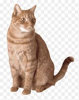
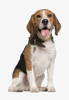
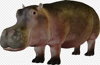
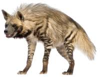
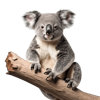
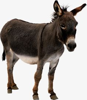
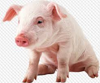
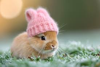
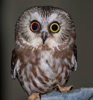
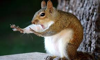
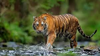
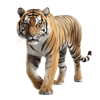
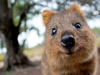
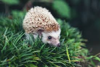
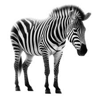

In [1]:
import os
import pandas as pd
from PIL import Image
import glob
from io import BytesIO
import base64
from IPython.display import display, HTML

def get_image_info(folder_path):

    image_data = []

   
    image_files = glob.glob(os.path.join(folder_path, '*'))

    for file in image_files:
        try:
           
            with Image.open(file) as img:
                
                file_name = os.path.basename(file)
                color_mode = img.mode
                file_format = img.format
                channels = len(img.getbands())
                file_size_mb = round(os.path.getsize(file) / (1024 * 1024), 2)
                width, height = img.size
                full_path = os.path.abspath(file)

               
                img.thumbnail((100, 100))
                buffer = BytesIO()
                img.save(buffer, format="PNG")
                img_thumbnail = base64.b64encode(buffer.getvalue()).decode()

              
                image_data.append({
                    "Ім'я файлу": file_name,
                    "Кольорова модель": color_mode,
                    "Формат": file_format,
                    "Кількість каналів": channels,
                    "Розмір файлу (МБ)": file_size_mb,
                    "Ширина": width,
                    "Висота": height,
                    "Повний шлях": full_path,
                    "Зменшене зображення": f"<img src='data:image/png;base64,{img_thumbnail}' width='100' height='100'/>"
                })

        except Exception as e:

            continue

    
    df = pd.DataFrame(image_data)

  
    return df


if __name__ == "__main__":
    folder_path = input("Введіть шлях до папки з зображеннями: ")
    df_images = get_image_info(folder_path)
    
  
    display(HTML(df_images.to_html(escape=False))) 


Введіть шлях до папки з зображеннями:  D:\Pictures
Введіть назву вихідного файлу (наприклад, poster.jpg):  Poster.jpg
Скільки зображень у рядку:  3
Скільки зображень у стовпчику:  3


Постер збережено як D:\Pictures\Poster.jpg


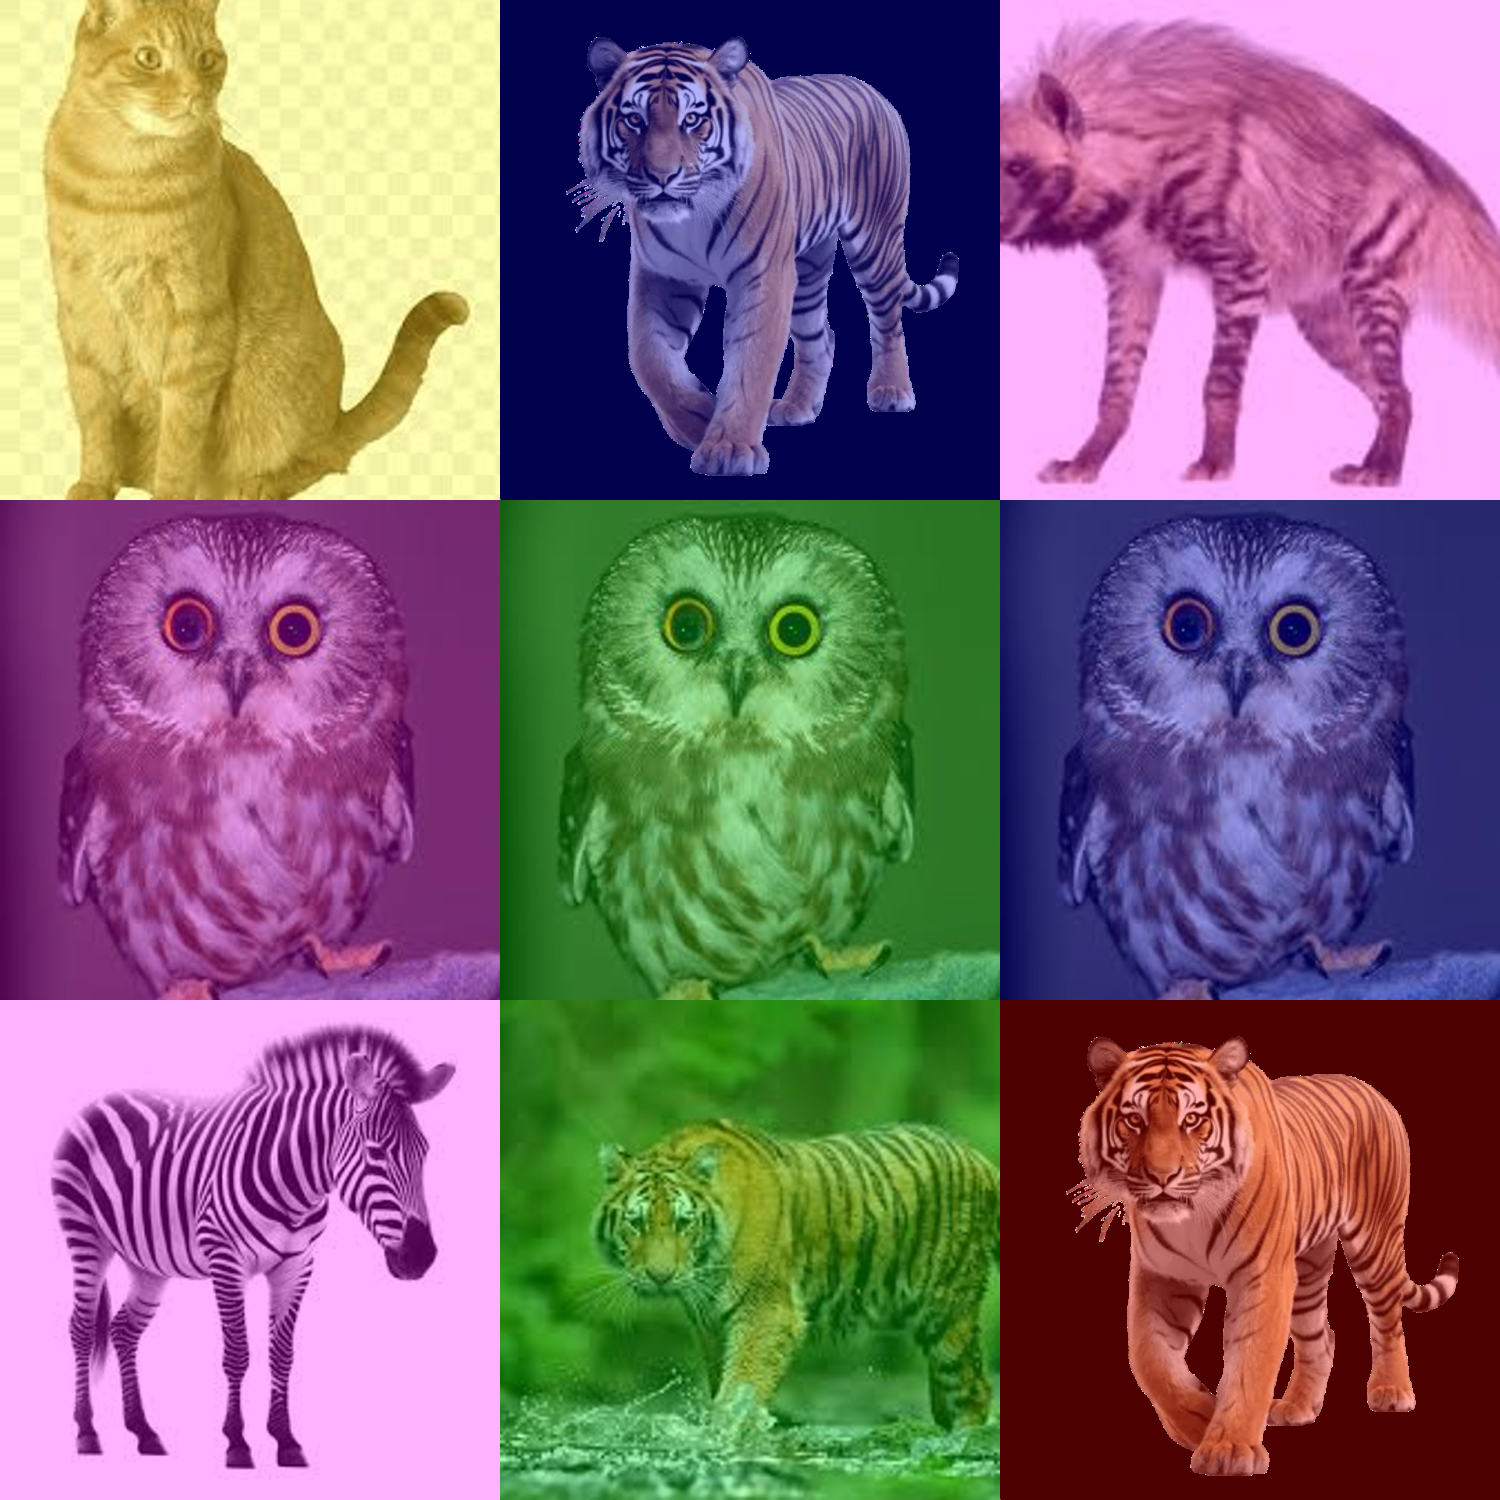

In [2]:
import os
import random
from PIL import Image
from IPython.display import display

def crop_image_square(image):
    """
    Центрує і обрізає зображення до квадратної форми.
    """
    width, height = image.size
    side_length = min(width, height)
    left = (width - side_length) // 2
    top = (height - side_length) // 2
    right = left + side_length
    bottom = top + side_length
    return image.crop((left, top, right, bottom))

def apply_random_overlay(image):
    """
    Додає до зображення випадковий кольоровий шар.
    """
    overlays = {
        "red": (255, 0, 0),
        "green": (0, 255, 0),
        "blue": (0, 0, 255),
        "yellow": (255, 255, 0),
        "magenta": (255, 0, 255),
        "cyan": (0, 255, 255),
    }
    overlay_color = random.choice(list(overlays.values()))
    overlay = Image.new("RGB", image.size, overlay_color)
    return Image.blend(image.convert("RGB"), overlay, alpha=0.3)

def create_image_poster(folder, output_name, cols, rows, img_size=500):
    """
    Генерує постер із зображень у заданій папці.
    
    Параметри:
        folder (str): шлях до папки із зображеннями.
        output_name (str): назва файлу для збереження постера.
        cols (int): кількість стовпчиків.
        rows (int): кількість рядків.
        img_size (int): розмір кожного зображення в пікселях (за замовчуванням 500x500).
    """
    # Отримати всі зображення у папці
    image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    
    if not image_files:
        print("У папці немає зображень.")
        return
    
    poster_width = cols * img_size
    poster_height = rows * img_size
    poster_canvas = Image.new("RGB", (poster_width, poster_height), "white")
    
    for row in range(rows):
        for col in range(cols):
            try:
                image_path = os.path.join(folder, random.choice(image_files))
                with Image.open(image_path) as img:
                    # Обрізка і підготовка зображення
                    img = crop_image_square(img)
                    img = img.resize((img_size, img_size))
                    img = apply_random_overlay(img)
                    
                    # Розміщення зображення на постері
                    x_offset = col * img_size
                    y_offset = row * img_size
                    poster_canvas.paste(img, (x_offset, y_offset))
            except Exception as e:
                print(f"Помилка з файлом {image_path}, пропускаємо... {e}")
    
    # Збереження постера
    output_path = os.path.join(folder, output_name)
    poster_canvas.save(output_path)
    print(f"Постер збережено як {output_path}")
    
    # Відображення створеного постера
    display(poster_canvas)

# Запит параметрів у користувача
folder = input("Введіть шлях до папки з зображеннями: ").strip()
output_name = input("Введіть назву вихідного файлу (наприклад, poster.jpg): ").strip()
cols = int(input("Скільки зображень у рядку: "))
rows = int(input("Скільки зображень у стовпчику: "))

if os.path.isdir(folder):
    create_image_poster(folder, output_name, cols, rows)
else:
    print("Вказана папка не знайдена. Перевірте шлях і спробуйте ще раз.")
